Text(0.5, 0, 'Aika')

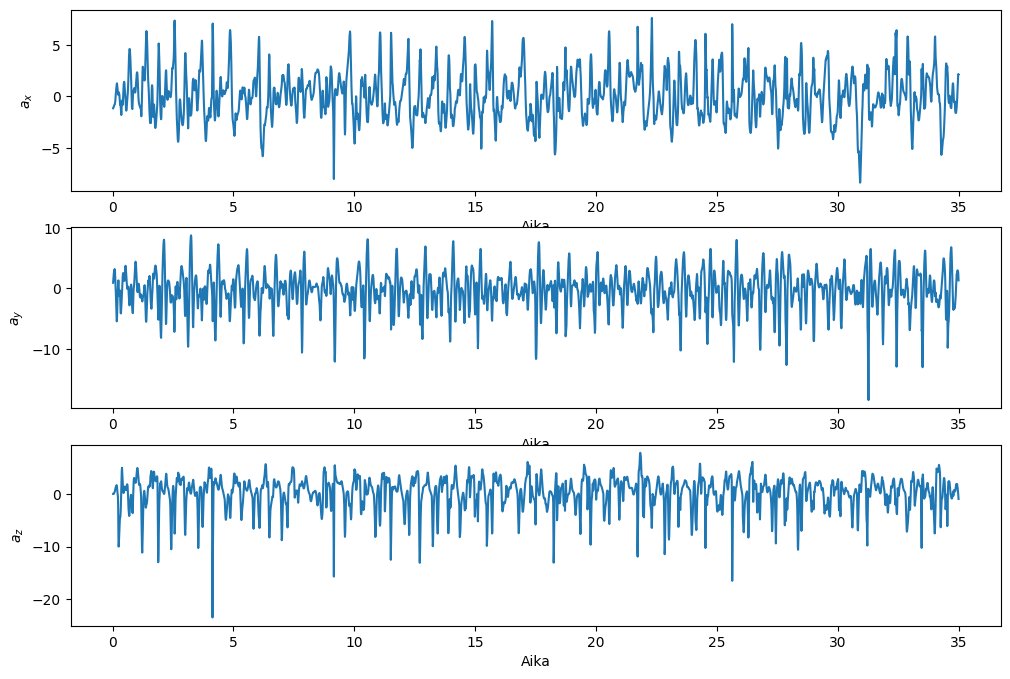

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('askeldata.csv')

plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
plt.plot(df['Time (s)'], df['Linear Acceleration x (m/s^2)'])
plt.ylabel('$a_x$')
plt.xlabel('Aika')
plt.subplot(3,1,2)
plt.plot(df['Time (s)'], df['Linear Acceleration y (m/s^2)'])
plt.ylabel('$a_y$')
plt.xlabel('Aika')
plt.subplot(3,1,3)
plt.plot(df['Time (s)'], df['Linear Acceleration z (m/s^2)'])
plt.ylabel('$a_z$')
plt.xlabel('Aika')


In [26]:
from scipy.signal import butter,filtfilt

def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    #Getting the coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

Askelten määrä on  58.0


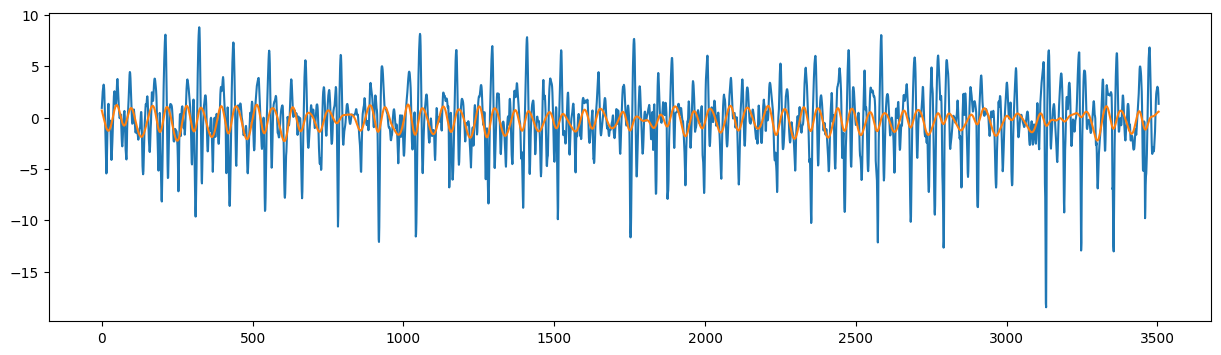

In [27]:
#Suodatetaan data

data = df['Linear Acceleration y (m/s^2)']
T = df['Time (s)'].max() #otetaan datan pituus
n = len(df['Time (s)']) #annetaan datapisteiden määrä
fs = n/T #näytteenottotaajuus
nyq = fs/2
order = 3
cutoff = 1/0.5
filt_signal = butter_lowpass_filter(data, cutoff, fs, nyq, order)

#alkuperäinen a_y ja suodatettu
plt.figure(figsize = (15,4))
plt.plot(data)
plt.plot(filt_signal)

#Lasketaan askeleet ja tulkitaan signaalin nollatason ylitys
jaksot = 0
for i in range(n-1):
    if filt_signal[i]/filt_signal[i+1] < 0:
        jaksot = jaksot + 1

print('Askelten määrä on ', jaksot/2)